# Lab
### Część 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

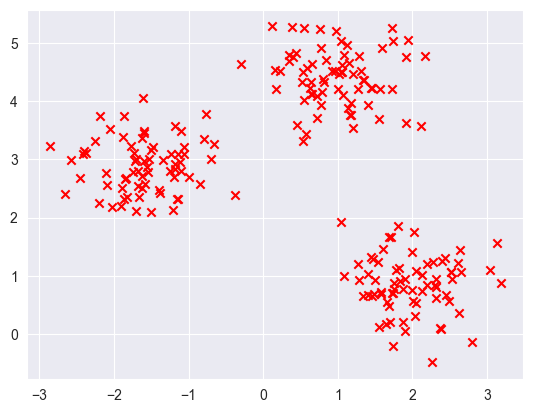

In [2]:
X, y = make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')
plt.show()

C:\Users\Bartlomiej\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


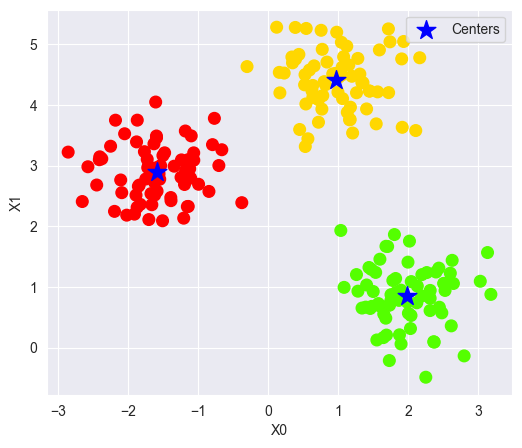

In [3]:
km = KMeans(n_clusters=3, init='random')
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [4]:
print(km.inertia_)

98.78710787930851


### Zadanie 2 - KMeans

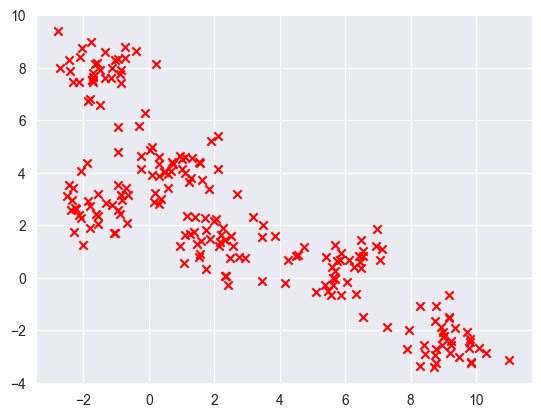

In [5]:
X, y = make_blobs(n_samples=210, centers=6, n_features=2, cluster_std=0.75, shuffle=True, random_state=0)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')
plt.show()

ex2

C:\Users\Bartlomiej\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


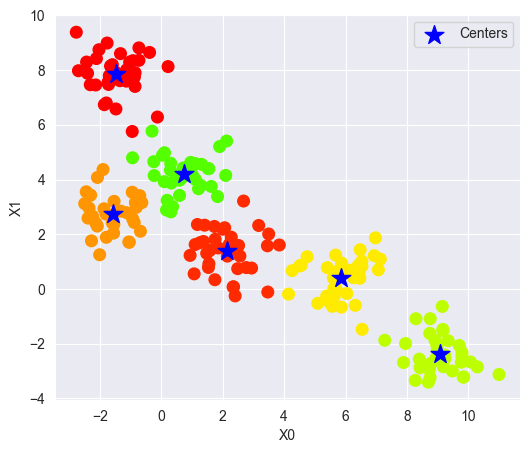

212.74064630839308


In [6]:
km = KMeans(n_clusters=6, init='random')
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()
print(km.inertia_)

ex3

C:\Users\Bartlomiej\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


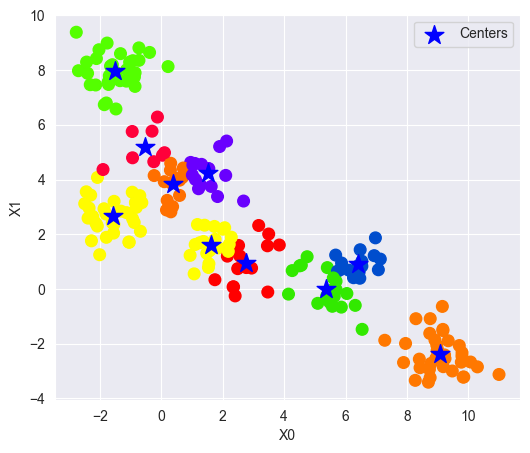

152.02253285694658


In [7]:
km = KMeans(n_clusters=10, init='random')
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()
print(km.inertia_)

### Zadanie 3 - Kmeans++

C:\Users\Bartlomiej\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


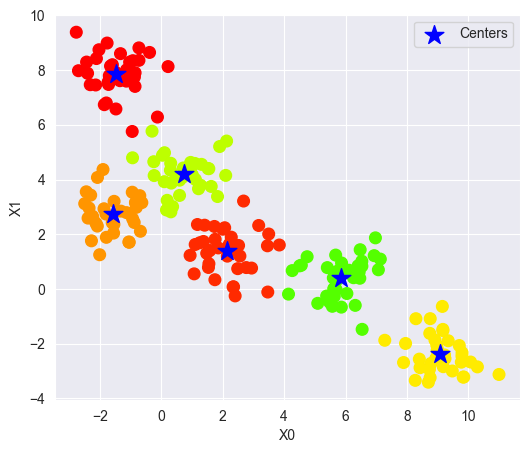

212.74064630839308


In [8]:
km = KMeans(n_clusters=6, init="k-means++")
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200, color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()
print(km.inertia_)

### Zadanie 4 - metoda lokciowa

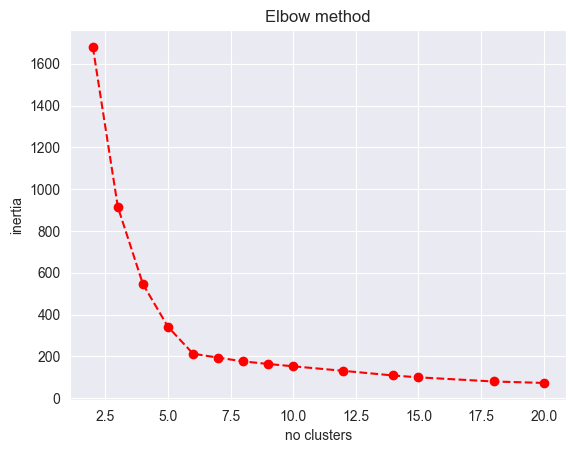

In [9]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 18, 20]
inertias = []
for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10)
    km.fit_predict(X, y)
    inertias.append(km.inertia_)

plt.plot(K, inertias, '--or')
plt.xlabel("no clusters")
plt.ylabel("inertia")
plt.title("Elbow method")
plt.show()

### Zadanie 5 - make_moons

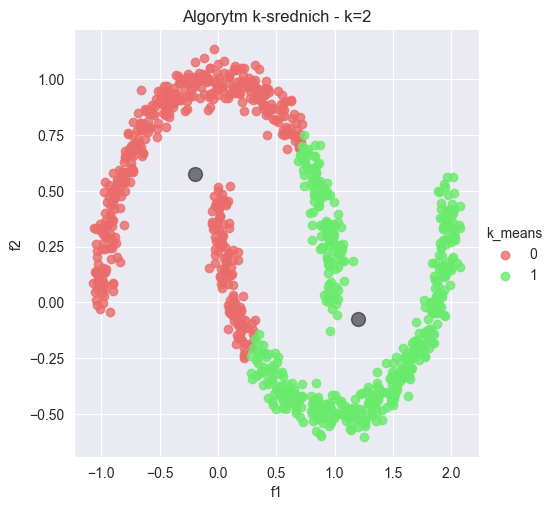

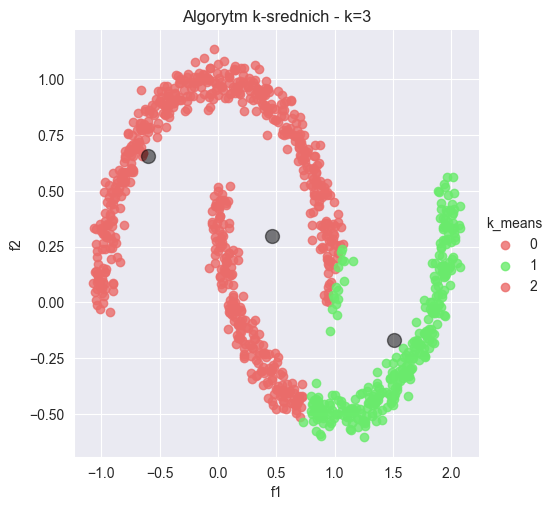

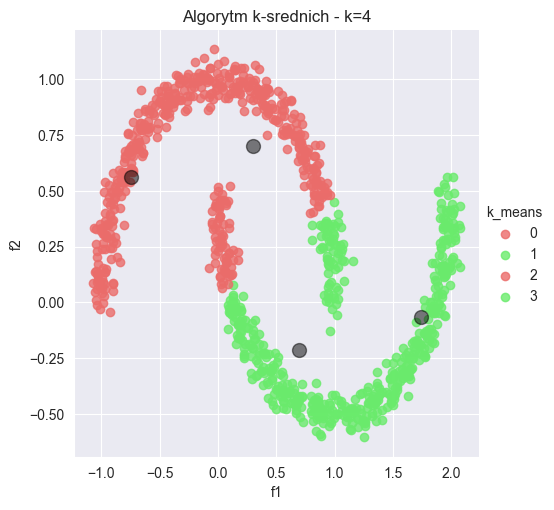

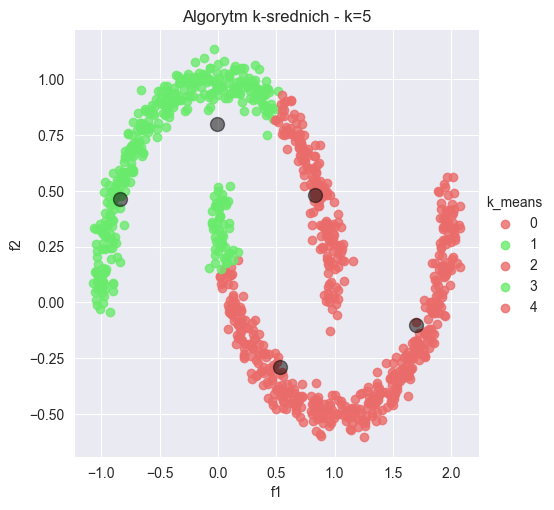

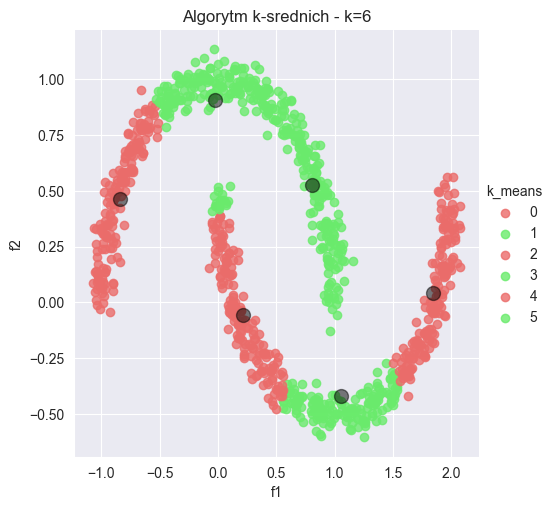

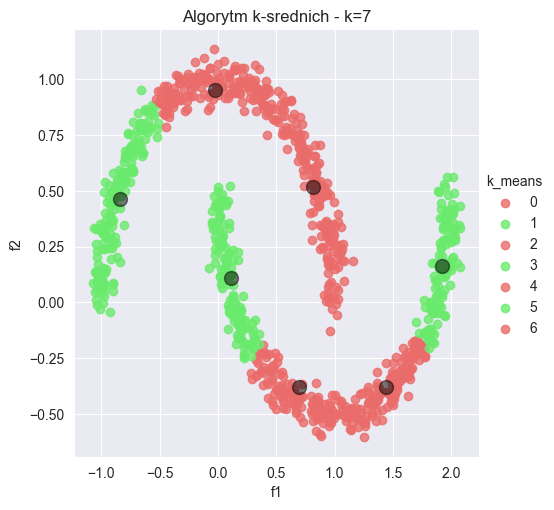

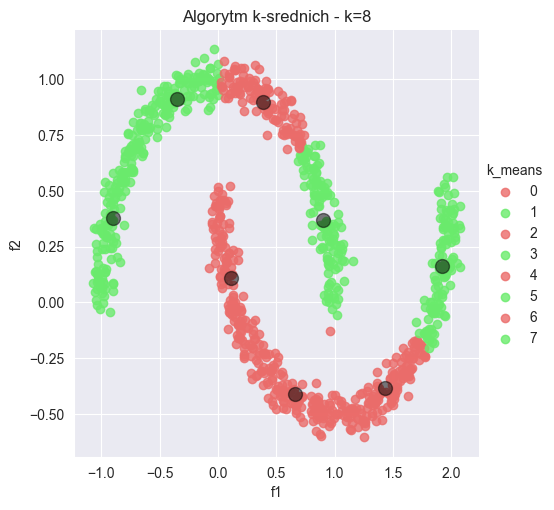

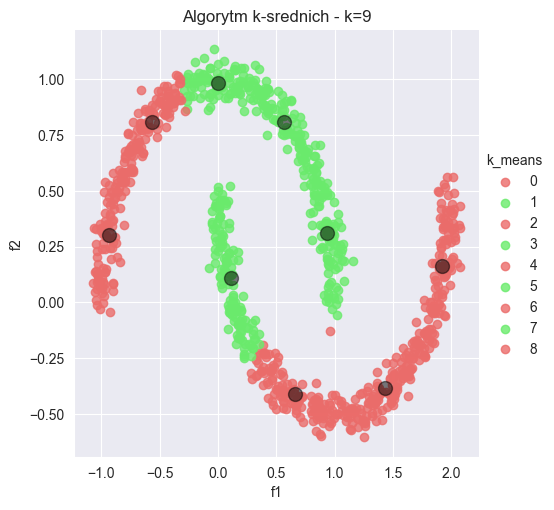

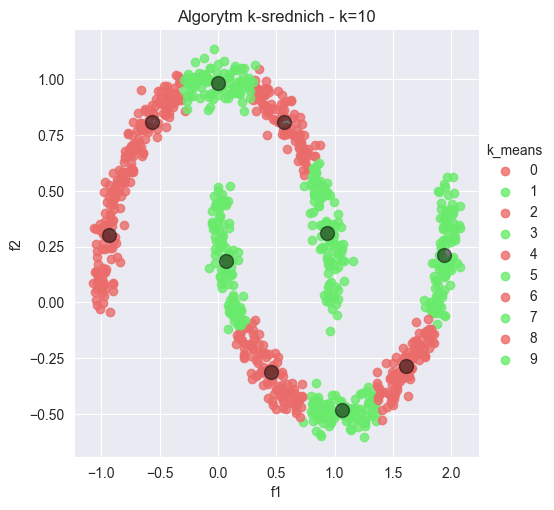

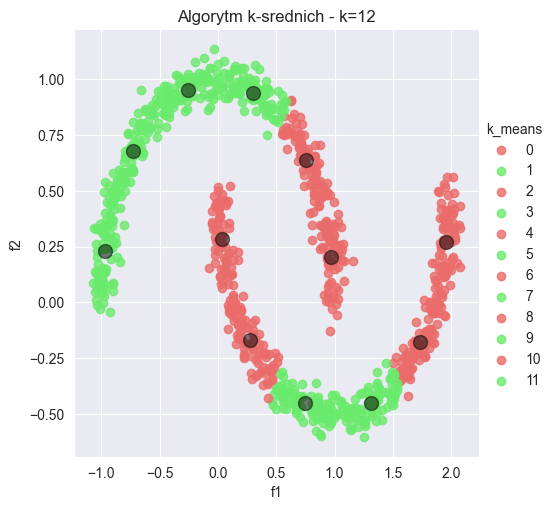

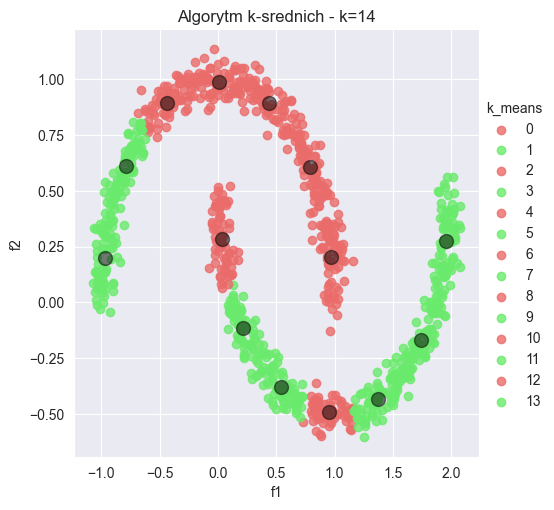

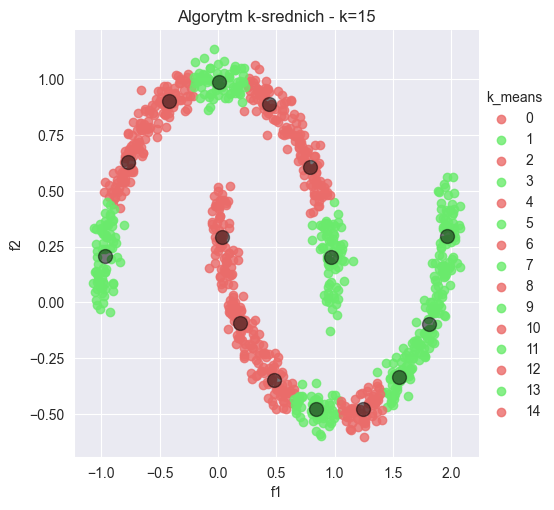

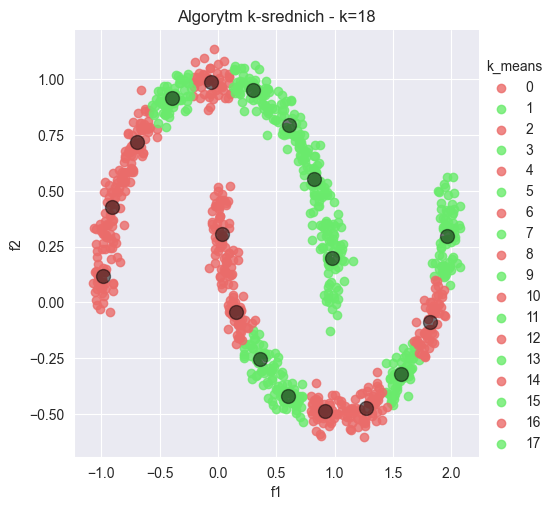

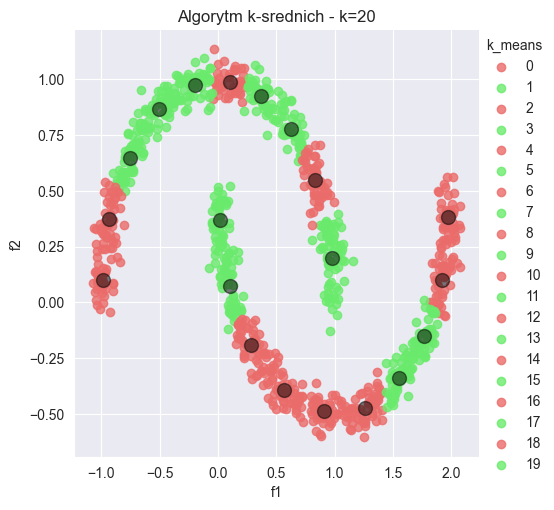

In [10]:
from sklearn.datasets import make_moons
import seaborn as sns

x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

for k in K:
    km = KMeans(n_clusters=k, init="k-means++", n_init=100, algorithm="elkan")
    y_km = km.fit_predict(x, y)

    #wykres
    X_moon['k_means'] = y_km
    sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title=f'Algorytm k-srednich - k={k}')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
    plt.show()

### Część 2

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5638447755761442
For n_clusters = 6 The average silhouette_score is : 0.4513398152234391


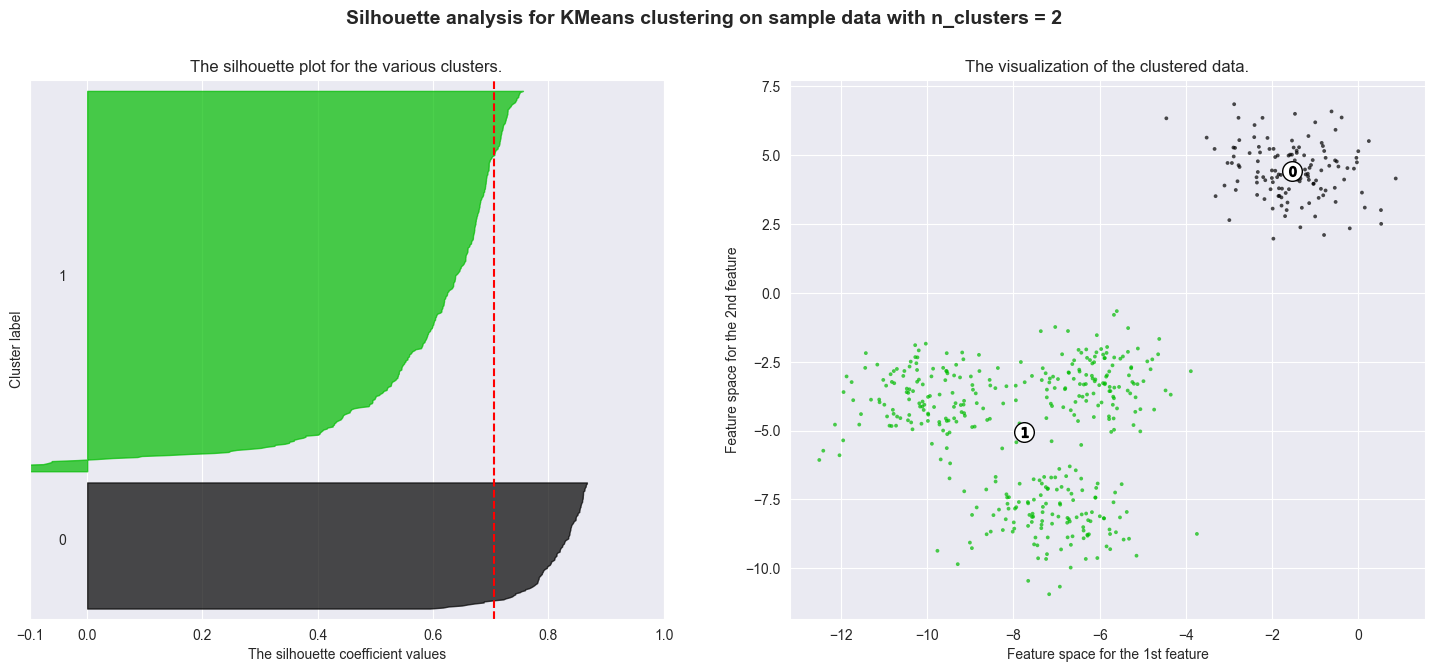

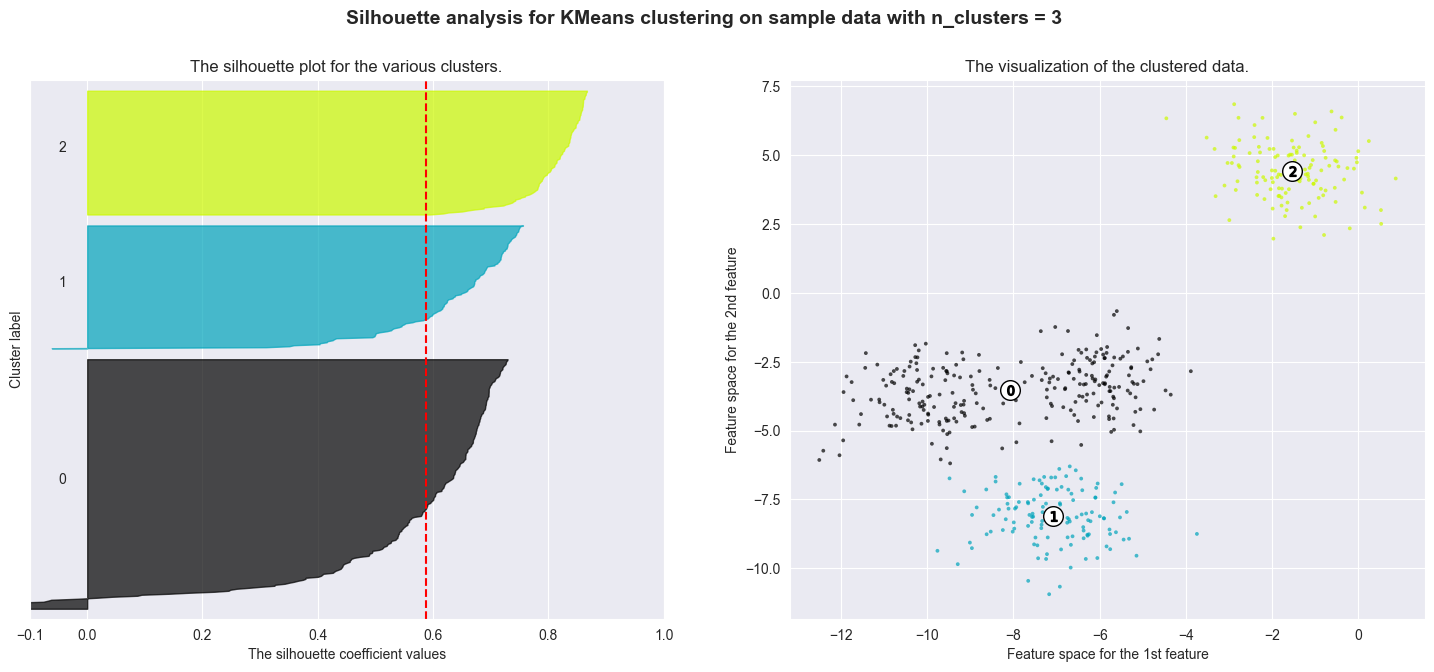

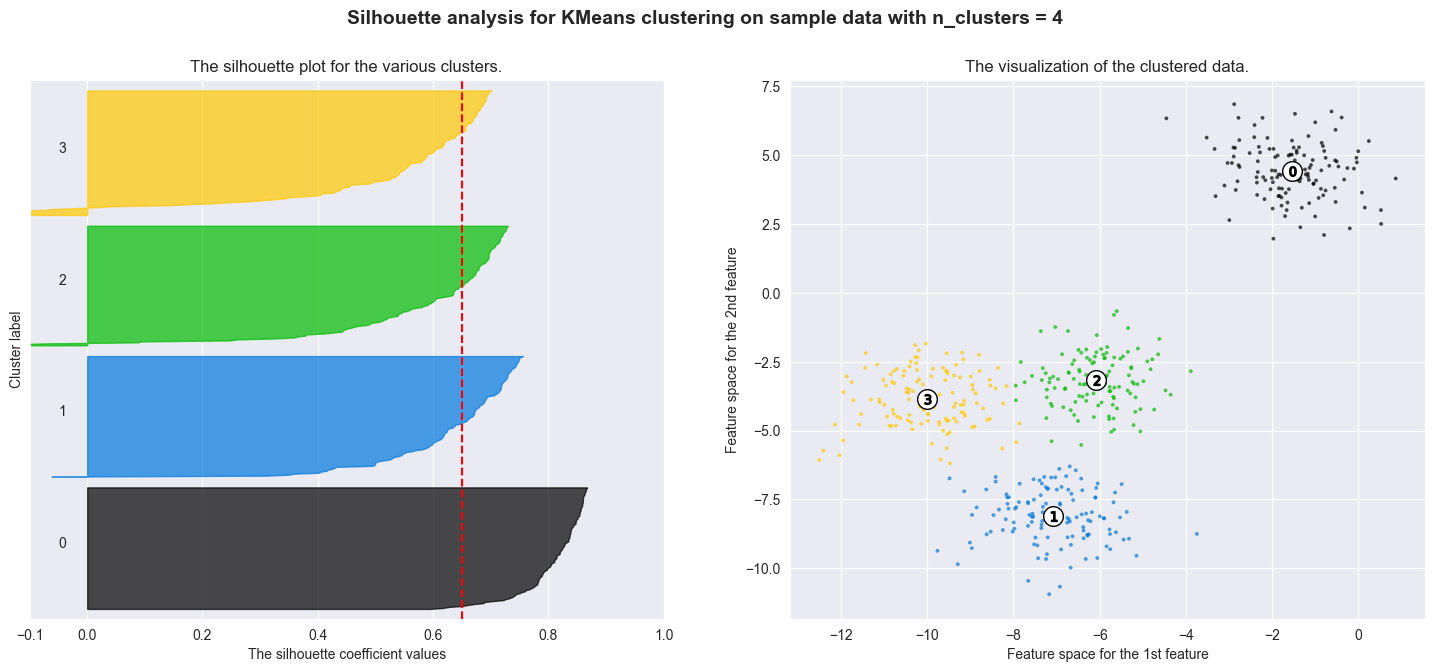

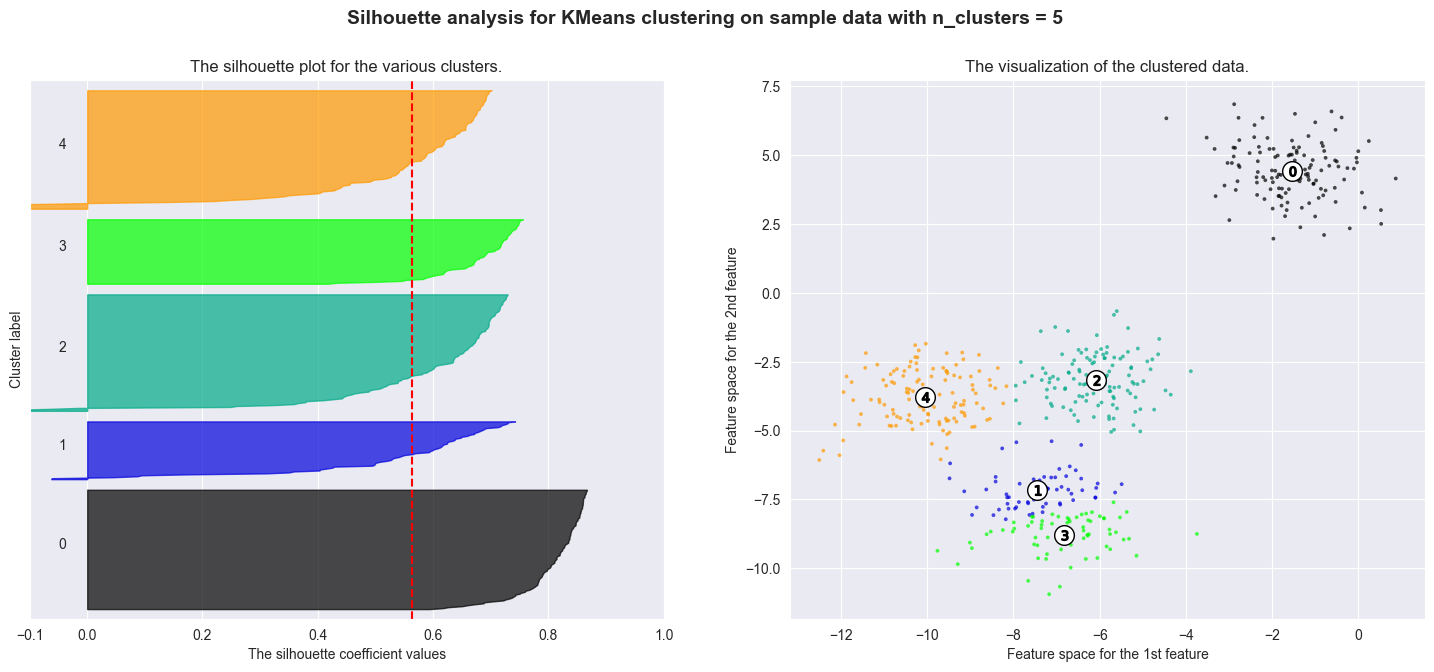

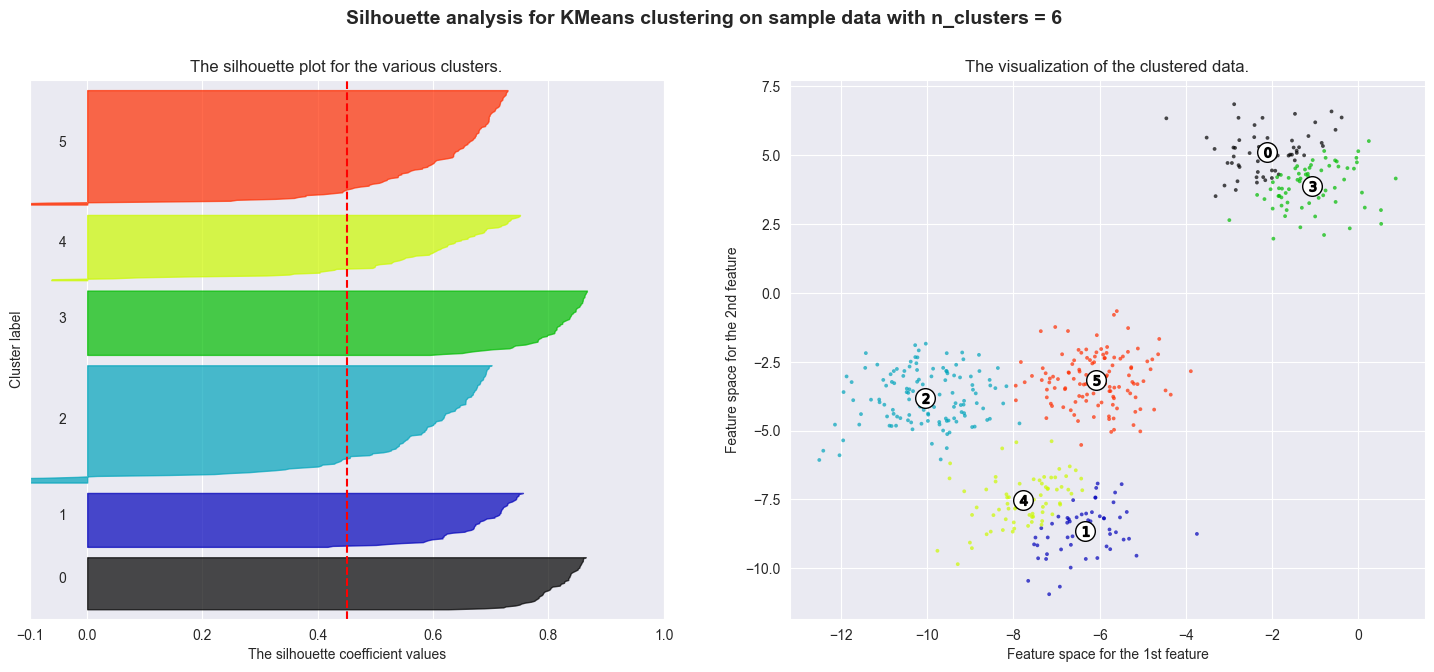

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np


# Generowanie danych
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)
# Wybór liczby skupień celem porównania
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Proszę stworzyć model klasy KMeans z liczbą klastrówn_clusters oraz losową liczbą wstępnych centroidów random_state=10


    clusterer = KMeans(n_clusters=n_clusters, init="random", random_state=10, n_init=10)
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X, y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values =  silhouette_samples(X, y)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Klasteryzacja hierarchiczna

For linkage = ward 
The average silhouette_score is : 0.5529945955148897


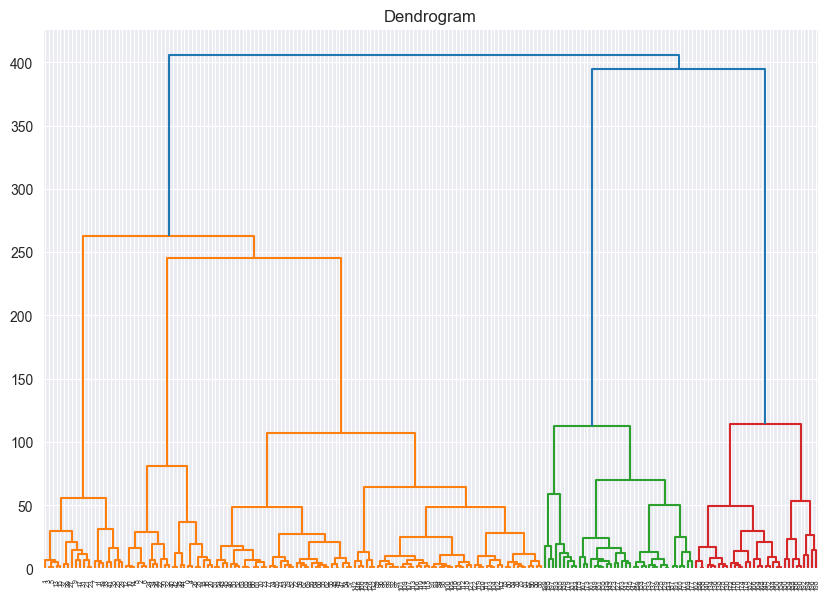

For linkage = average 
The average silhouette_score is : 0.4791911539647448


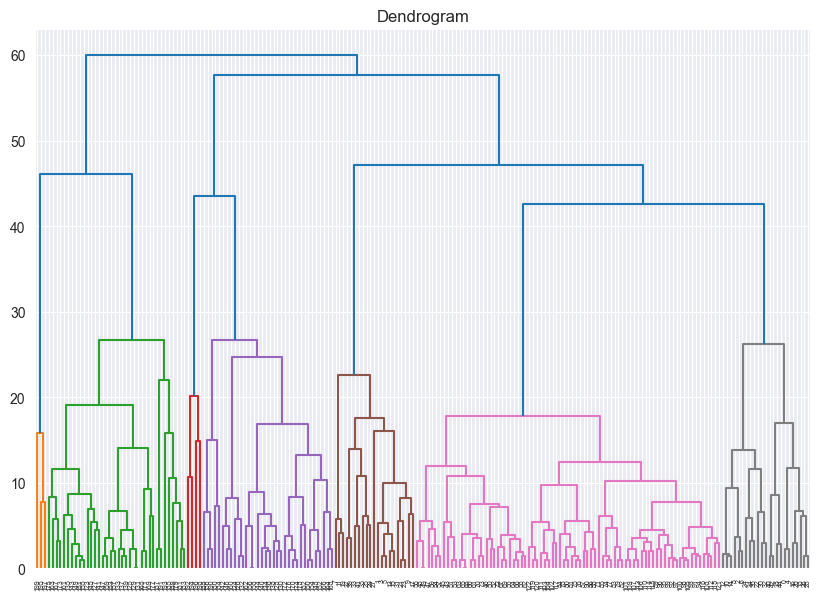

For linkage = complete 
The average silhouette_score is : 0.5529945955148897


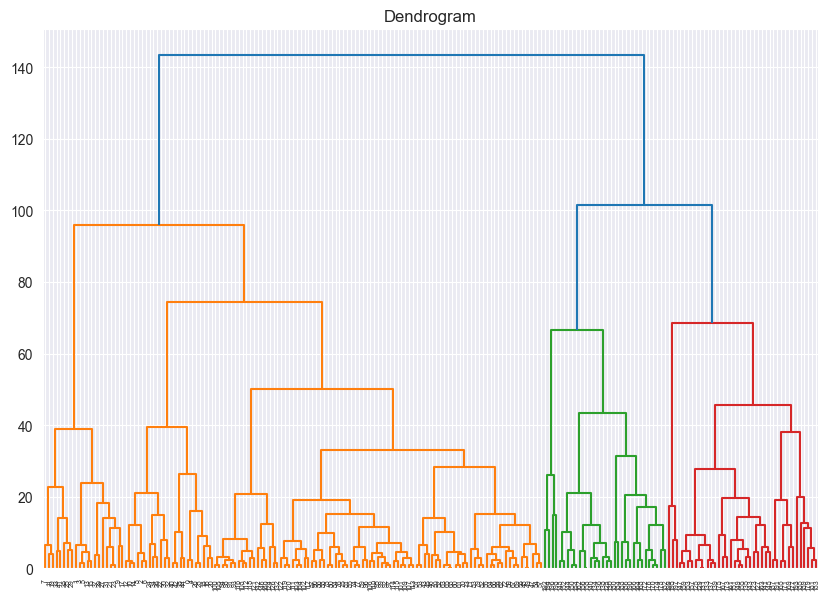

For linkage = single 
The average silhouette_score is : 0.2694896445402342


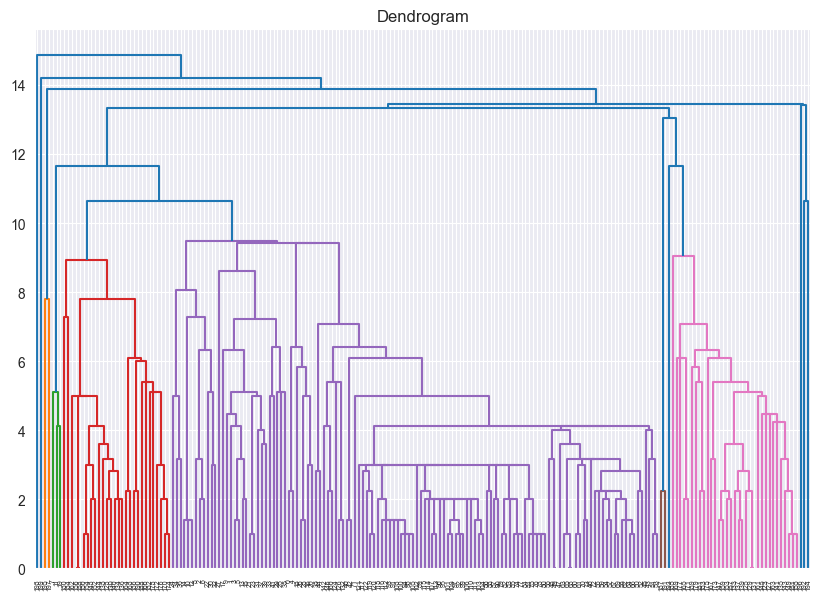

In [12]:
import pandas as pd
import os
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as ch

path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)

data = customer_data.iloc[:, 3:5].values

a_types = ["ward", "average", "complete", "single"]
for linkage_type in a_types:
    agc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage=linkage_type)
    cluster_labels = agc.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For linkage =", linkage_type,
          "\nThe average silhouette_score is :", silhouette_avg)


    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram")

    distance = ch.linkage(data, method=linkage_type)
    ch.dendrogram(distance)
    plt.show()


For linkage = ward 
The average silhouette_score is : 0.43779962020896995


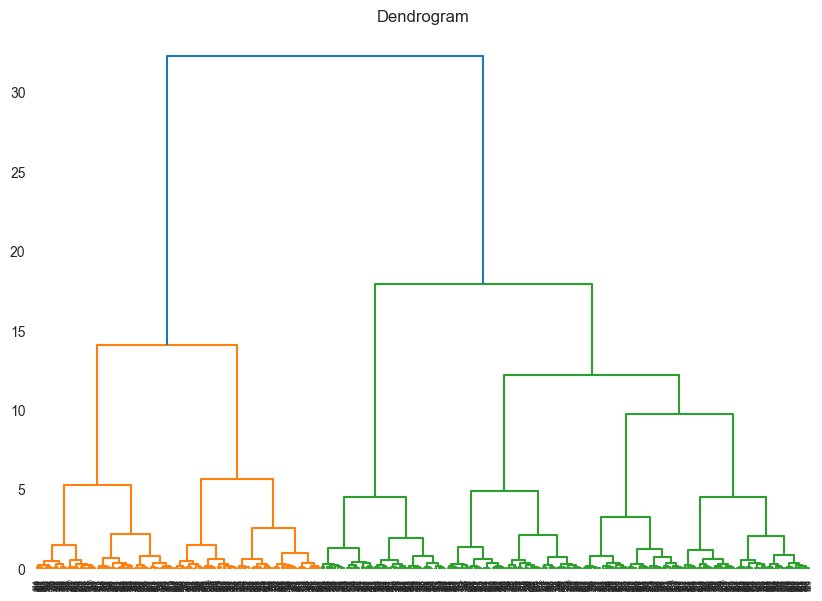

For linkage = average 
The average silhouette_score is : 0.4640124901550164


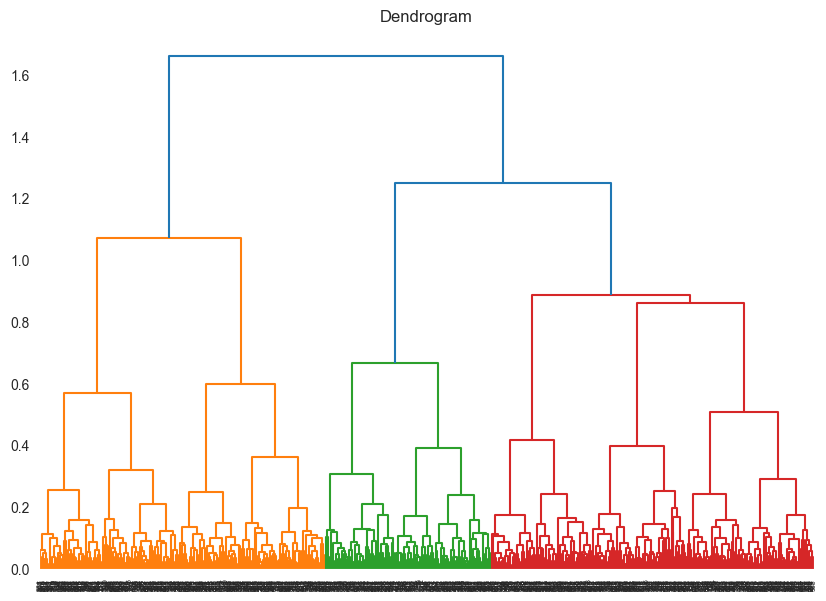

For linkage = complete 
The average silhouette_score is : 0.4192285739294747


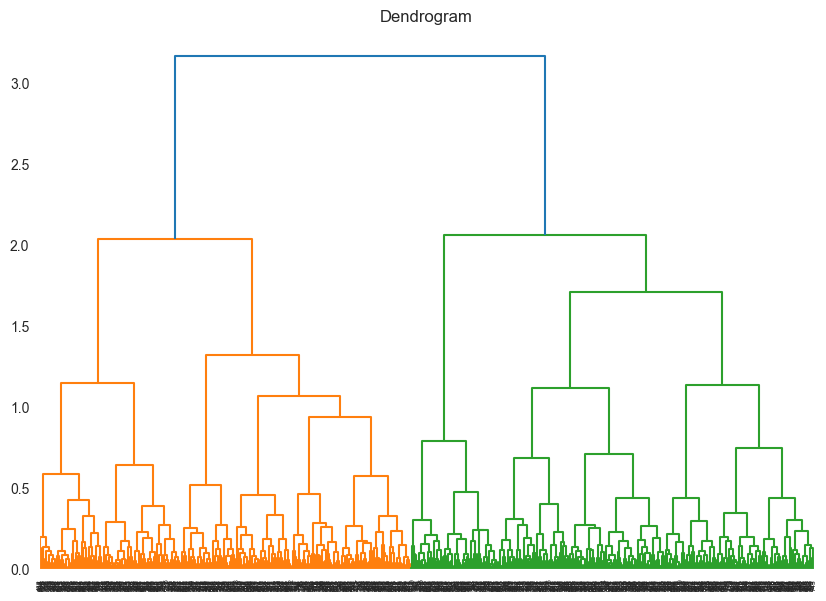

For linkage = single 
The average silhouette_score is : -0.3443830402837535


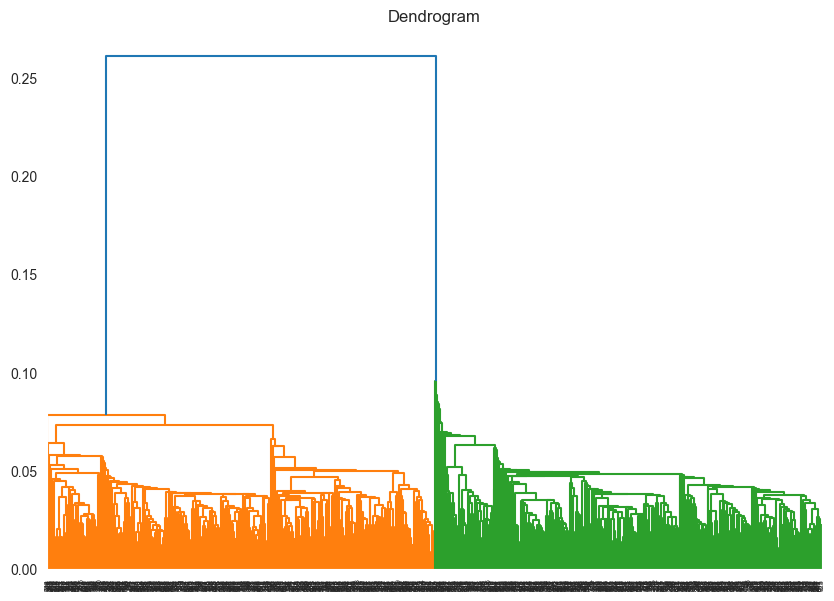

In [13]:
x, y = make_moons(1000, noise=.05, random_state=0)

a_types = ["ward", "average", "complete", "single"]
for linkage_type in a_types:
    agc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage=linkage_type)
    cluster_labels = agc.fit_predict(x, y)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For linkage =", linkage_type,
          "\nThe average silhouette_score is :", silhouette_avg)


    plt.figure(figsize=(10, 7))
    plt.title("Dendrogram")

    distance = ch.linkage(x, method=linkage_type)
    ch.dendrogram(distance)
    plt.show()
